In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for rsa<5,>=3.1.4 from https://files.pythonhosted.org/packages/49/97/fa78e3d2f65c02c8e1268b9aba606569fe97f6c8f7c2d74394553347c145/rsa-4.9-py3-none-any.whl.metadata
  Obtaining dependency information for oauthlib>=3.0.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 1.2 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 19s 2us/step


In [5]:
X_train[0].shape

(28, 28)

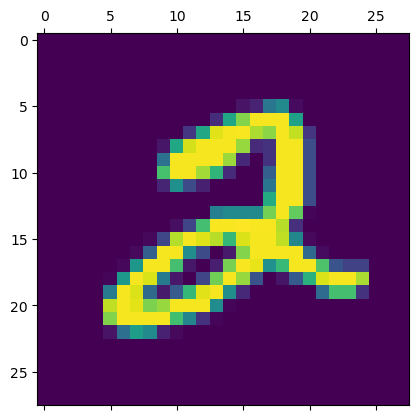

In [6]:
plt.matshow(X_train[5])

In [7]:
y_train[5]

2

In [8]:
X_train = X_train / 255
X_test = X_test / 255      ## scaling to achieve accuracy 

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.2739 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.1213 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.0845 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.0638 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.0511 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.0399 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.0324 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.0271 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 1s 551u

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 366us/step - loss: 0.0806 - accuracy: 0.9772


[0.08057590574026108, 0.9771999716758728]

313/313 [==============================] - 0s 306us/step


Text(95.72222222222221, 0.5, 'Truth')

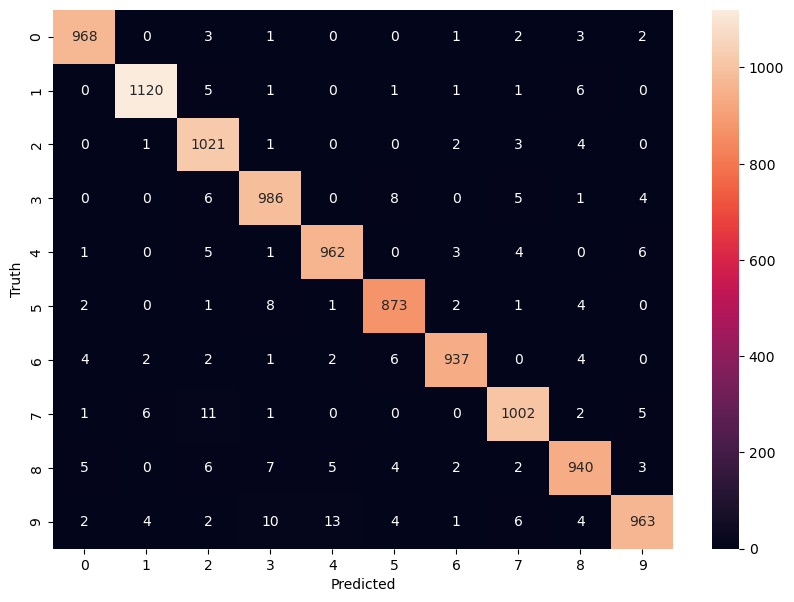

In [14]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
